# Track & Explore the ISS in Realtime
Historical SpaceX & NASA Launch of Astronauts Robert Behnken & Douglas Hurley to the ISS

In [15]:
#Import Libraries
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

#Determine who is currently at ISS
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'message': 'success',
 'number': 5,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'},
  {'craft': 'ISS', 'name': 'Doug Hurley'},
  {'craft': 'ISS', 'name': 'Bob Behnken'}]}

*As of May 31st 2020, Results indicate a total of 5 Astronauts:
    - Chris Cassidy
    - Anatoly Ivanishin
    - Ivan Vagner
    - Doug Hurley
    - Bob Behnken

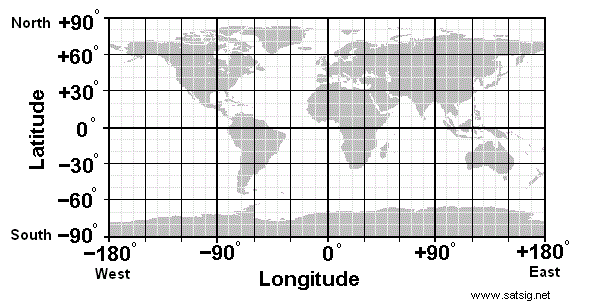

In [7]:
#Picture/Map for Illustration
#http://www.satsig.net/lat_long.htm
Image(filename='satsig_explanation.png', width='100%')

In [8]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
ISS_location = (r.json())
print(ISS_location)

{'timestamp': 1590938030, 'iss_position': {'latitude': '-13.9959', 'longitude': '-59.0157'}, 'message': 'success'}


In [9]:
ISS_location['timestamp']

1590938030

In [10]:
#float(ISS_location['iss_position']['longitude']['latitude'])
float(ISS_location['iss_position']['latitude'])
float(ISS_location['iss_position']['longitude'])
float(ISS_location['timestamp'])

1590938030.0

In [11]:
conda install -c conda-forge basemap-data-hires

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

Text(0.5, 1.0, 'International Space Station Location')

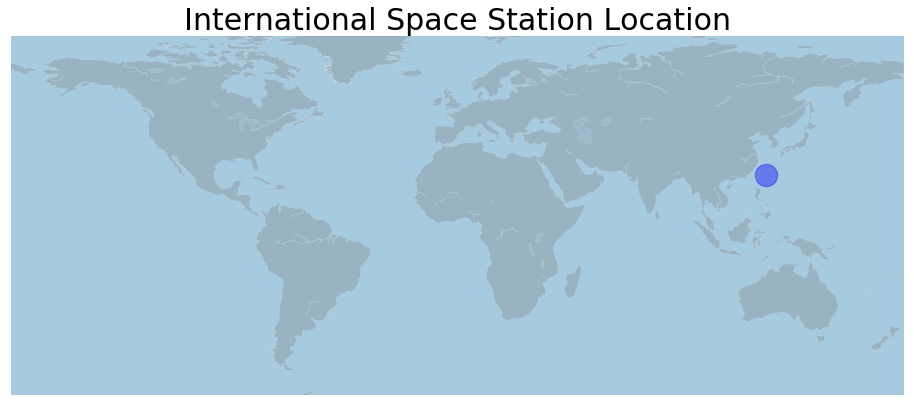

In [11]:
# Plotting ISS current location
from mpl_toolkits.basemap import Basemap

# Set Dimension of the figure
plt.figure(figsize=(16, 8))

# Make Background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

#m.scatter(23.8604, 124.5377, s=500, alpha=0.4, color='blue')
m.scatter(float(ISS_location['iss_position']['longitude']), 
          float(ISS_location['iss_position']['latitude']), 
          s=500, alpha=0.4,color='blue')

plt.title('International Space Station Location' , fontsize=30) 
 

In [ ]:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    
    import time
    starttime=time.time()
    
    space_station_data = []
    while True:
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        ISS_location = (r.json())
        print(ISS_location)
        
        space_station_data.append([ISS_location['timestamp'],
                                ISS_location['iss_position']['latitude'],
                                ISS_location['iss_position']['longitude']
                                ])
        
        #Dump copy to file
        tmp_space_station_data_df = pd.DataFrame(
            space_station_data, columns=['timestamp', 'latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        #Safety Break
        if len(space_station_data) > 18000:
            break
            
        # Let it sleep 60 seconds
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))
            
                                 
                                

{'timestamp': 1590938222, 'iss_position': {'latitude': '-4.3592', 'longitude': '-51.9059'}, 'message': 'success'}
